In [1]:
#!pip install tensorflow==2.7.0
#!pip uninstall pydot
#!pip uninstall pydotplus
#!pip uninstall graphviz

#!pip install pydot
#!pip install pydotplus
#!conda install -c anaconda graphviz

# Sequential API

## Exemple 1

In [2]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# on charge les données
dataset = loadtxt('data.csv', delimiter=',')

# split input et output
X = dataset[:,0:8]
y = dataset[:,8]

Déscription du dataset : https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names

In [4]:
# définition du modèle
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# on compile le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# on entraîne le modèle avec nos données
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 3ms/step - loss: 8.1257 - accuracy: 0.6406
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2062 - accuracy: 0.6224
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.6380
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.6445
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.6523
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.6523
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6562
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6341
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6628
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6810
Epoch 11/

In [6]:
# évaluation du modèle
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7669
Accuracy: 76.69


In [7]:
# on calcule les probabilités
predictions = model.predict(X)

# on fait des prévisions avec ces probabilités
predictions = (model.predict(X) > 0.5).astype(int)

In [8]:
# résumé des 5 premiers exemples
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


## Exemple 2

In [9]:
from keras.datasets import mnist
from keras.layers import Dropout, Flatten

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10)
])

In [12]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.48223487,  0.21188416,  0.24121518, -0.41911632,  0.8150071 ,
        -0.29093456, -0.5330268 ,  0.4040267 ,  0.07328811, -0.0399319 ]],
      dtype=float32)

# Functional API

L'API "Functional" de Keras est plus flexible dans la définition des modèles.

Plus spécifiquement, il nous permet de définir des modèles avec des "inputs" ou "outputs" multiples, ainsi que des modèles qui partagent des couches ("shared layers").

Les modèles sont définis en créant les couches et en les connectant directement entre elles. Ensuite, on définit un modèle et on spécifie les couches qui seront utilisés comme "input" et "output".

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

## La définition des inputs
Différement du modéle Sequential, on doit créer et définir une couche "Input" pour spécifier le format des données d'entrée.
Pour définir ce format, on fournie un tuple à la couche d'entrée.

Quand les données d'entrée sont multidimensionnelles, comme pour un Perceptron multi-couches, le format doit explicitement laisser de l'espace pour la taille du mini-batch, utilisé pour splitter les données lors de l'entraînement. Ainsi, le tuple est toujours défini avec une dérnière dimension vide quand l'input est uni-dimensionnel. Par exemple, (2,).

In [14]:
visible = Input(shape=(2,))

## La connéction des couches
Les couches sont connectées par paires.

Cela est fait en spécifiant l'origine de l'input dès que l'on définit une nouvelle couche.

Regardons un petit exemple. Nous créons l'input comme on l'a fait dans l'exemple précedent, et ensuite on crée une couche cachée en utilisant Dense, qui reçoit l'input de la couche input.

In [15]:
visible = Input(shape=(2,))
hidden = Dense(2)(visible)

## La création du modèle
Après avoir crée les couches du modèle et les avoir connectées, il faut définir le modèle.

Dans Keras, il existe une classe "Model", utilisé pour créer un modèle à partir des couches. Il faut spécifier uniquement les couches d'entrée et de sortie.

In [16]:
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


## Standard Network Models

### Multilayer Perceptron
Regardons un modèle du type "Multilayer Perceptron" pour faire de la classification binaire.

Le modèle a 10 inputs, 3 couches cachées avec 10, 20 e 10 neurons, et une couche de sorte avec 1 output. 

Pour chaque couche cachée, on utilise un fonction d'activation du type "Unité Linéaire Rectifiée" (ou ReLU), et une fonction d'activation du type "Sigmoid" pour la sortie.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 20)                220       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


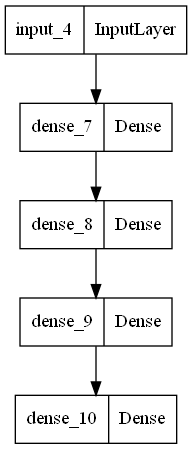

In [17]:
from keras.utils.vis_utils import plot_model

visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)

# summary du modèle
print(model.summary())

# graph
plot_model(model, to_file='img/multilayer_perceptron_graph.png')

### CNN
Les CNN, ou réseaux de neurones convolutifs sont plus souvent utilisés pour la classification d'images.

Le modèle prend en entrée des images en noir et blanc, de 64x64, et a une séquence de 2 couches convolutives et 2 couches de "pooling" pour l'extraction des features, suivies par une couche "fully-connected" (Dense) pour interpréter ces couches et une couche de sortie avec un fonction d'activation du type "sigmoid" pour une classification binaire.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        8208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0   

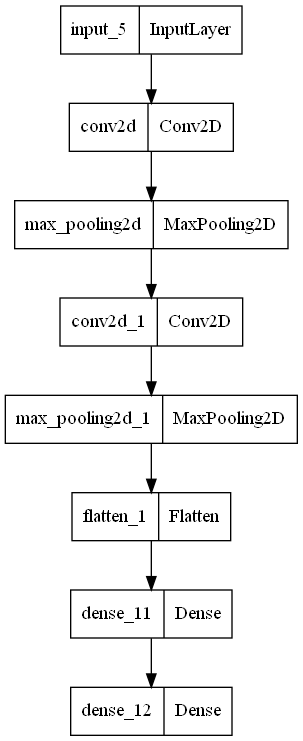

In [18]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Flatten

visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# summary du modèle
print(model.summary())

# graph
plot_model(model, to_file='img/convolutional_neural_network.png')

### RNN
Maintenant, nous alons créer un réseau de neurones récurrents du type LSTM (Long Short-Term Memory), pour classifier des séquences.

Le modèle prend en entrée 100 steps d'une même feature. Le modèle a une seule couche LSTM cachée pour extraire des features de la séquence, suivie par une couche du type "fully connected" pour interpréter la sortie de la LSTM, suivie par une couhce de sortie pour des prédictions binaires.

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
None


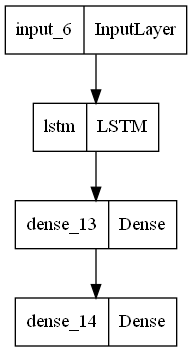

In [19]:
from keras.layers.recurrent import LSTM

visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

# summary du modèle
print(model.summary())

# graph
plot_model(model, to_file='img/recurrent_neural_network.png')

### Shared Layers Model
Plusieurs couches peuvent partager la sortie d'une couche.

Par exemple, on peut avoir plusieurs couches d'extraction de features d'un même input, ou plusieurs couches pour interpréter la sortue d'une couche d'extraction de features.

Regardons ces 2 exemples plus en détail.

#### Shared input layer
Nous alons créer plusieurs couches de convolution avec des kernels de différentes tailles pour interpréter un image.

Le modèle prend des images en noir & blanc, et 64x64 pixels. Il y a 2 sub-modèles du type CNN d'extraction de features qui partagent cet input; le premier a un kernel de taille 4 et le 2ème un kernel de taille 8. Les sorties de ces submodèles d'extraction de features sont applatis en vecteurs et concatenés pour former un long vecteur, et après sont utilisés par une couche du type "fully connected" pour être interpretés avant qu'une couche finale de sortie fasse une classification binaire.

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 61, 61, 32)   544         ['input_7[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 57, 57, 16)   1040        ['input_7[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 30, 30, 32)  0           ['conv2d_2[0][0]']               
                                                                                            

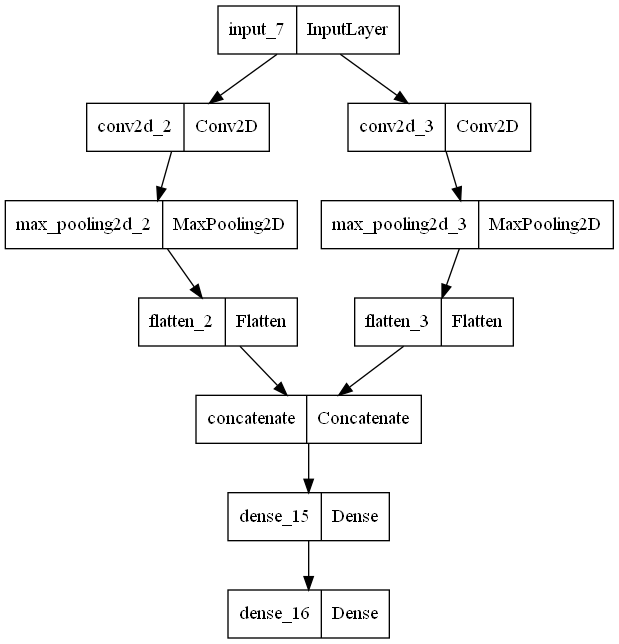

In [20]:
from keras.layers.merge import concatenate

# input layer
visible = Input(shape=(64,64,1))

# 1er feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# 2ème feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

# concatenation des "feature extractors"
merge = concatenate([flat1, flat2])

# couche d'interprétation
hidden1 = Dense(10, activation='relu')(merge)

# output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# summary du modèle
print(model.summary())

# graph
plot_model(model, to_file='img/shared_input_layer.png')

#### Shared Feature Extraction Layer
Nous allons créer 2 sub-modèles parallels pour interpréter la sortie d'un extracteur de features, pour faire une classification de séquences.

L'input du modèle est composé par 100 "time steps" d'une feature. Une couche LSTM avec 10 célules de mémore interprète cette séquence. Le premier modèle d'interprétation est une couche du type "fully connected"; le 2ème est un modèle profond de 3 couches. La sortie des 2 modèles d'interprétation sont concatenés pour former un long vecteur, qui est ensuite utilisé par la couche finale de sortie pour faire une classification binaire.

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100, 1)]     0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (None, 10)           480         ['input_8[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 10)           110         ['lstm_1[0][0]']                 
                                                                                                  
 dense_19 (Dense)               (None, 20)           220         ['dense_18[0][0]']               
                                                                                            

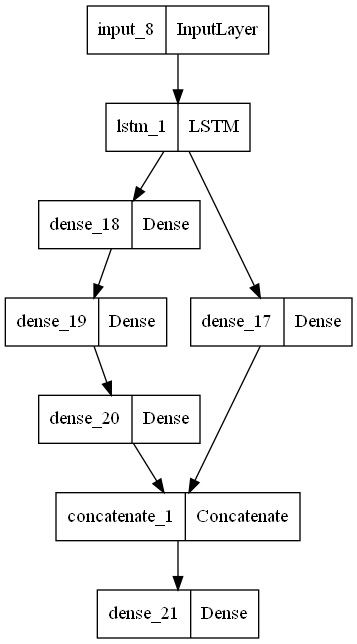

In [21]:
# input layer
visible = Input(shape=(100,1))

# feature extractor
extract1 = LSTM(10)(visible)

# 1er modèle d'interpretation
interp1 = Dense(10, activation='relu')(extract1)

# 2ème modèle d'interpretation
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)

# concatenation des couches d'interprétation
merge = concatenate([interp1, interp13])

# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)

# summary do modèle
print(model.summary())

# graph
plot_model(model, to_file='img/shared_feature_extractor.png')